# Linear Regression
This is a test to use the scikit-learn's LinearRegression to model the amount of filament used per minute of the cohort class Edison+ 3D Printer.

### Import Dependencies


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import csv
%run 'preprocessor.ipynb' #our own preprocessor functions

### Prepare Dataset

In [2]:
with open('data_w1w4.csv', 'r') as f:
      reader = csv.reader(f)
      data = list(reader)
    
matrix = obtain_data_matrix(data)
samples = len(matrix)
print("Number of samples: " + str(samples))

Y = matrix[:,[8]]
X = matrix[:,[9]]
S = matrix[:,[11]]

Number of samples: 176


### Use the model (LinearRegression)

In [3]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, Y)

# Make predictions using the testing set
Y_pred = regr.predict(X)

### Plot the data

Coefficients:  [[ 0.08229866]]


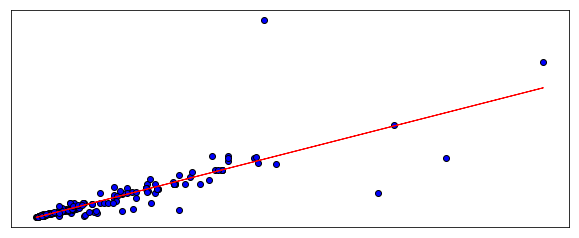

Mean squared error: 122.52
Variance score: 0.71


In [4]:
fig = plt.figure(1, figsize=(10, 4))
plt.scatter([X], [Y], color='blue', edgecolor='k')
plt.plot(X, Y_pred, color='red', linewidth=1)

plt.xticks(())
plt.yticks(())

print('Coefficients: ', regr.coef_)

plt.show()

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y, Y_pred))

### Bootstrap to find parameter confidence intervals

In [5]:
from sklearn.utils import resample

bootstrap_resamples = 5000
intercepts = []
coefs = []
for k in range(bootstrap_resamples):
    #resample population with replacement
    samples_resampled = resample(X,Y,replace=True,n_samples=len(X))
    
    ## Fit model to resampled data
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(samples_resampled[0], samples_resampled[1])
    
    coefs.append(regr.coef_[0][0])
    intercepts.append(regr.intercept_[0])

#### Calculate confidence interval

In [6]:
alpha = 0.95
p_lower = ((1-alpha)/2.0) * 100
p_upper = (alpha + ((1-alpha)/2.0)) * 100
coefs_lower = np.percentile(coefs,p_lower)
coefs_upper = np.percentile(coefs,p_upper)
intercepts_lower = np.percentile(intercepts,p_lower)
intercepts_upper = np.percentile(intercepts,p_upper)
print('Coefs %.0f%% CI = %.5f - %.5f' % (alpha*100,coefs_lower,coefs_upper))
print('Intercepts %.0f%% CI = %.5f - %.5f' % (alpha*100,intercepts_lower,intercepts_upper))

Coefs 95% CI = 0.06371 - 0.10284
Intercepts 95% CI = -2.82305 - 1.91128


#### Visualize frequency distributions of bootstrapped parameters 

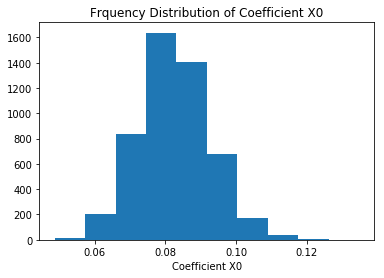

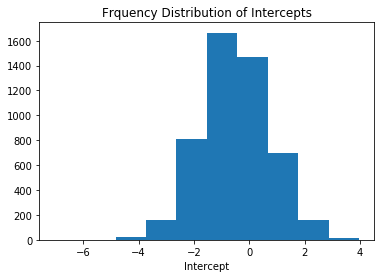

In [7]:
plt.hist(coefs)
plt.xlabel('Coefficient X0')
plt.title('Frquency Distribution of Coefficient X0')
plt.show()

plt.hist(intercepts)
plt.xlabel('Intercept')
plt.title('Frquency Distribution of Intercepts')
plt.show()